<a href="https://colab.research.google.com/github/BlancaCC/ComputacionNumerica/blob/main/practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apartado 1**

## Ejercicio 1

Antes de proceder a la solución se han creado las siguientes funciones auxiliares

In [192]:
from matplotlib import pyplot as plt
from functools import reduce 
import numpy as np
from math import log2

def get_graphic(function, title=False, step_bias= 1.606, step= 2**-52, y_lim_parameters=(8.7523765807784,8.7523765807786)):
    """get_graphic(function, step=1.606 + 2**-52, y_lim_parameters=[8.7523765807784,8.7523765807786]) -> void
    Plotting function
    """
    amount_of_iterations = 800
    x = [ step_bias + i*step for i in range(amount_of_iterations) ]
    y = list(map(function, x))

    plt.plot(x, y,'b.')
    plt.ylim(y_lim_parameters)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    if(title):
        plt.title(title, loc='right')
    plt.show()


In [179]:
def function_a(x: float) -> float:
  num = 4 * x**4 - 59 * x**3 + 324 * x**2 - 751*x + 622
  den = x**4 - 14 * x**3 + 72 * x**2 - 151*x + 112
  return num / den

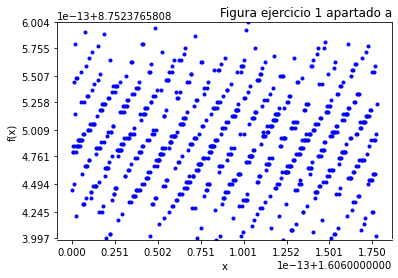

In [180]:
get_graphic(function_a, title='Figura ejercicio 1 apartado a')

## Respuestas a la primera cuestión  

Notemos primero que $f_a(x)$ es una función continua en el intervalo en que se nos pide representarlo: 

In [181]:
amount_of_iterations = 800
step_bias= 1.606
step= 2**-52
x = [ step_bias + i*step for i in range(amount_of_iterations) ]
print(f"El intervalo es [{x[0]},{x[1]}]")#intervalo

El intervalo es [1.606,1.6060000000000003]


Ya que las raíces del denominador son las siguientes y como vemos no es ninguna en tal intervalo (ni real).

In [182]:
np.roots([1,-14,72,-151,112]) 

array([5.07672837+1.82253504j, 5.07672837-1.82253504j,
       1.92327163+0.3879571j , 1.92327163-0.3879571j ])

Por tratarse entonces de una función continua, la imagen de un intervalo debería de ser un intervalo, sin embargo dicha situación que no es el caso por dos motivos: 

1. **Precisión de la arquitectura de 64 bits.** Nótese que el rango parte de 1.606 y se incrementa en saltos de $2^{-52}$, ya que es imposible plasmar la continuidad; para arquitecturas de 64 bits en el sistema de representación IEEE $2^{-52}$ es el menor valor positivo posible.

Si la representación de la imagen fuera perfecta entonces puntos muy próximos debería de tener la misma imagen, esto se contradice en los puntos que aparece prácticamente *en vertical*. 

2. **Redondeo de la imagen de la función**.
Puede observarse que los saltos de la imagen son de $10^{13}$ la misma magnitud que el dominio, luego los puntos verticales se producen por los múltiples errores de redondeo que se cometen.

In [183]:
def function_b(x: float) -> float:
  num = 622 + x * (-751 + x * (324 + x * (-59 + 4 * x)))
  den = 112 + x * (-151 + x * (72 + x * (-14 + x)))
  return num / den

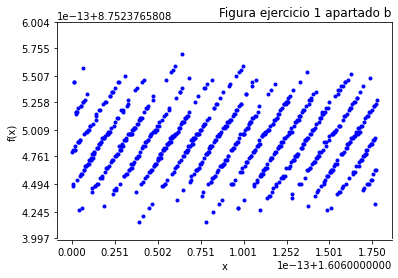

In [184]:
get_graphic(function_b, title='Figura ejercicio 1 apartado b')

In [185]:
def function_c(x: float) -> float:
  num = 3*(x - 2)*((x - 5)**2 + 4)
  den = x + (x - 2)**2*((x - 5)**2 + 3)
  return 4 - num / den

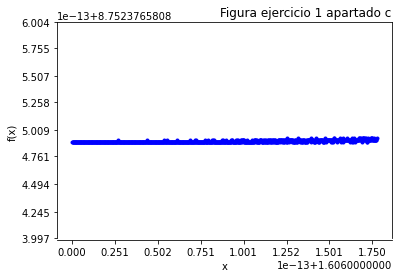

In [186]:
get_graphic(function_c, title='Figura ejercicio 1 apartado c')

## Cuestión 1

[Respuesta]

## Cuestión 2

[Respuesta]

## Cuestión 3

[Respuesta]

## *Ejercicio opcional*



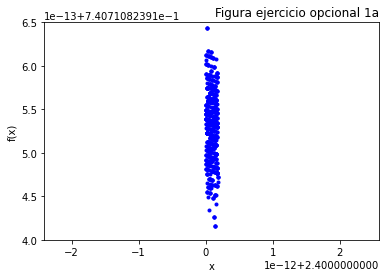

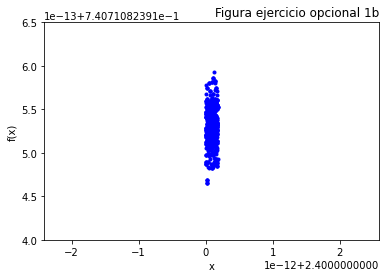

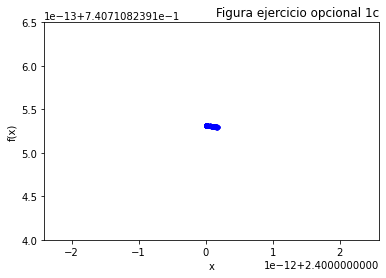

In [187]:
# optional parameters
optional_step_bias = 2.4
optional_step = 2**-52
optional_y_lim_parameters=(.7407108239094,.74071082390965)

get_graphic( function_a, title='Figura ejercicio opcional 1a', step_bias= optional_step_bias, step=optional_step,
 y_lim_parameters=optional_y_lim_parameters)

get_graphic(function_b, title='Figura ejercicio opcional 1b', step_bias= optional_step_bias, step=optional_step,
 y_lim_parameters=optional_y_lim_parameters)

get_graphic(function_c, title='Figura ejercicio opcional 1c', step_bias= optional_step_bias, step=optional_step,
 y_lim_parameters=optional_y_lim_parameters)

[Respuesta]

# **Apartado 2**

In [188]:
import numpy as np

X = np.array([[1,0,0],[1,0.25,0.25**2],[1,0.5,0.5**2],[1,0.75,0.75**2],[1,1,1]])
Y = (np.array([[1,1.2840,1.6487,2.1170,2.7183]])).T
print(f"X={X}\n y={Y}")

X=[[1.     0.     0.    ]
 [1.     0.25   0.0625]
 [1.     0.5    0.25  ]
 [1.     0.75   0.5625]
 [1.     1.     1.    ]]
 y=[[1.    ]
 [1.284 ]
 [1.6487]
 [2.117 ]
 [2.7183]]


In [189]:
u,s,vh=np.linalg.svd(X)
print(u.shape, s.shape, vh.shape)
smat = np.zeros((5, 3))
smat[:3, :3] = np.diag(s)
print(f"u\n{u}\n s\n{smat}\n vh\n{vh}")

(5, 5) (3,) (3, 3)
u
[[-0.29454913  0.63267484  0.63140925 -0.02576091 -0.33707876]
 [-0.346616    0.45500901 -0.21036331  0.28091869  0.74138797]
 [-0.41593037  0.19422733 -0.52439676 -0.68819061 -0.20169135]
 [-0.50249224 -0.14967019 -0.3106911   0.63666879 -0.47246617]
 [-0.60630161 -0.57668356  0.43075367 -0.20363596  0.26984831]]
 s
[[2.71168512 0.         0.        ]
 [0.         0.93707467 0.        ]
 [0.         0.         0.16268803]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
 vh
[[-0.7987245  -0.4712162  -0.37415833]
 [ 0.59286357 -0.51017309 -0.62308604]
 [ 0.10272272 -0.71949893  0.68685467]]


In [190]:
# Apartado 2.2
z = np.array([ c[i]/_s for i,_s in enumerate(s) ])

a = vh.T @ z

print("test")
print(Y)
X @ a

NameError: name 'c' is not defined